In [1]:
import numpy as np
import networkx as nx

Generate active edges
---

In [2]:
def generate_active_edges(graph:nx.Graph, p:float) -> nx.Graph:
    """
    
    :param g: 
    :param p: 
    :return: 
    """
    g = graph.copy()

    edges = g.edges()

    edges_proba = np.array([g[u][v].get('weight', 1) for u, v in edges])
    edges_proba = edges_proba / edges_proba.max()

    activated_edges = edges_proba * np.random.uniform(size=g.number_of_edges()) <= p

    for activated, (u, v, info) in zip(activated_edges, g.edges.data()):
        g[u][v]['activated'] = activated

    return g

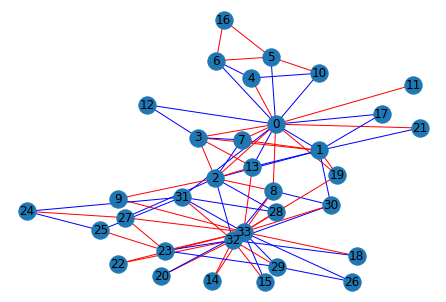

In [3]:
g = nx.karate_club_graph()

ag = generate_active_edges(g, .5)

edges_color = ["blue" if info["activated"] else "red" for u, v, info in ag.edges.data()]
nx.draw(ag, edge_color=edges_color, with_labels=True)

Get the number of neighbors accessible starting from a list of nodes
---

In [4]:
def get_accessible_neighbors(g, node):
    accessible_neighbors = []
    for neighbor in g.neighbors(node):
        if g[node][neighbor].get('activated', False):
            accessible_neighbors.append(neighbor)

    return accessible_neighbors

def get_number_accessible_neighbors(g:nx.Graph, A0:list) -> dict:
    neighbors = A0[:]
    new_neighbors = A0[:]
    while new_neighbors:
        node = new_neighbors.pop()
        new_neighbors += get_accessible_neighbors(g, node)
        new_neighbors = list(set(new_neighbors) - set(neighbors))
        neighbors += new_neighbors

    n = len(neighbors)
    return dict(
        n=n,
        accessible_neighbors=neighbors
    )

def greedy(graph:nx.Graph, k:int, n:int, p:float) -> list:
    A0 = []
    graphs = [generate_active_edges(graph, p) for _ in range(n)]

    for _ in range(k):
        nodes_to_test = list(set(graph.nodes) - set(A0))
        nodes_score = dict(zip(nodes_to_test, [0]*len(nodes_to_test)))
        for node in nodes_to_test:
            for g in graphs:
                accessible_dict = get_number_accessible_neighbors(g, A0+[node])
                nodes_score[node] += accessible_dict.get('n')

        # Retrieve the max
        best_node = max(nodes_score, key=nodes_score.get)
        A0.append(best_node)

    return A0



In [5]:
g = nx.karate_club_graph()


k = 2
n = 200
p = .25
A0 = greedy(g, k, n, p)

print(f"best {k} nodes with {n} simulations : {A0}")

best 2 nodes with 200 simulations : [33, 0]
